# Obtain detuning from FID

In [10]:
from matplotlib import pyplot as plt
import scipy as sc
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.optimize import curve_fit

#absolute path of repo root
rel_path = Path("/home/ben/Documents/Repos/382L_NMRLab/")

In [11]:
def smooth(y, pts): #Rolling avg smoothing
    box = np.ones(pts)/pts
    yfilt=np.convolve(y,box,mode='same')
    return yfilt

In [12]:
FIDData = pd.read_csv(rel_path / "data/pi_pulse/50.csv", header = None)
chan1 = FIDData[1].values
chan2 = FIDData[2].values
tlist = FIDData[0].values

chan1 = np.subtract(chan1, np.mean(chan1[2000:]))
chan2 = np.subtract(chan2, np.mean(chan2[2000:]))

chan1_smooth = smooth(chan1, 35)
chan2_smooth = smooth(chan2, 35)

trans_mag = np.sqrt(np.square(chan1_smooth) + np.square(chan2_smooth))

In [13]:
peaks, _ = sc.signal.find_peaks(
    np.square(trans_mag),
   # height = .2,
    distance = 250,
    #prominence = .5,
    width = 400
)

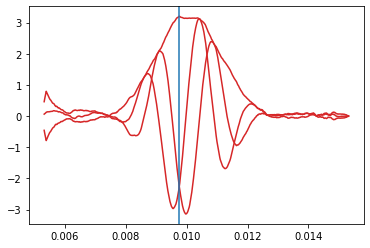

In [14]:
#plt.plot(tlist, chan1_smooth, color = "tab:red")
plt.plot(tlist, chan1_smooth, color = "tab:red")
plt.plot(tlist, chan2_smooth, color = "tab:red")
plt.plot(tlist, trans_mag, color = "tab:red")
plt.axvline(tlist[np.argmax(trans_mag)])
#plt.plot(tlist, chan2_smooth, color = "tab:blue")

In [15]:
data_dir = rel_path / "data/pi_pulse/"

In [23]:
def get_max(time):
    FIDData = pd.read_csv(data_dir / f"{time}.csv", header = None)
    chan1 = FIDData[1].values
    chan2 = FIDData[2].values
    tlist = FIDData[0].values

    chan1 = np.subtract(chan1, np.mean(chan1[2000:]))
    chan2 = np.subtract(chan2, np.mean(chan2[2000:]))
    
    chan1_smooth = smooth(chan1, 35)
    chan2_smooth = smooth(chan2, 35)
    
    trans_mag = np.sqrt(np.square(chan1_smooth) + np.square(chan2_smooth))

    popt, pcov = curve_fit(gaussian, tlist, trans_mag, p0=[3.2, .001, .01])
    print(popt)

    return popt[0]

In [24]:
data = [(int(f.stem),get_max(f.stem)) for f in data_dir.iterdir()]
times, heights = zip(*sorted(data))

[3.24098879e+00 1.03591231e-03 1.00634300e-02]
[3.11779434e+00 1.04173155e-03 1.00505631e-02]
[3.01020365e+00 1.02529595e-03 1.00769646e-02]
[3.11450954e+00 1.02963097e-03 1.00667507e-02]
[3.26559113e+00 1.03852672e-03 1.00651184e-02]
[3.19817442e+00 1.03972965e-03 1.00501621e-02]
[3.01247125e+00 1.04879114e-03 1.00386576e-02]
[2.87365585e+00 1.02961198e-03 1.00871713e-02]
[3.18744558e+00 1.03322382e-03 1.00642311e-02]
[3.27665957e+00 1.03889109e-03 1.00559896e-02]
[3.23893386e+00 1.04344121e-03 1.00535731e-02]


In [25]:
def gaussian(t, A, sigma, mu):
    return A * np.exp(-(t-mu)**2/(2*sigma**2))

def cos(t, A, omega, c):
    return A * np.cos(omega*(t-c))

from scipy.optimize import curve_fit
popt, pcov = curve_fit(cos, times, heights, p0=[3.21, .04, 49])

Text(0, 0.5, 'echo amplitdue (V)')

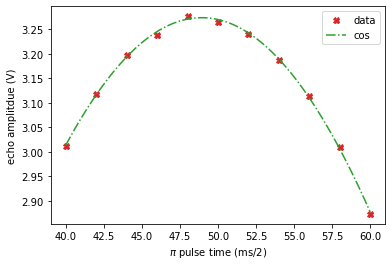

In [26]:
plt.plot(times, heights, marker = "X", linestyle = "None", color = "tab:red", label = "data")
xlist = np.linspace(min(times), max(times), 100)
plt.plot(xlist, [cos(x, *popt) for x in xlist], color = "tab:green", linestyle = "-.", label = "cos")
plt.legend()
plt.xlabel(r"$\pi$ pulse time (ms/2)")
plt.ylabel("echo amplitdue (V)")

In [20]:
popt[2]*2

NameError: name 'popt' is not defined

In [21]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(gaussian, tlist, trans_mag, p0=[3.2, .001, .01])

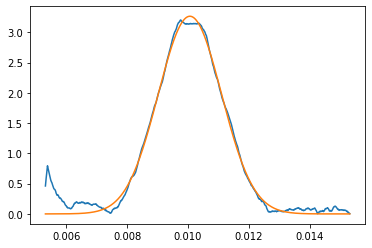

In [22]:
plt.plot(tlist, trans_mag)
plt.plot(tlist, [gaussian(t, *popt) for t in tlist])

In [ ]:
pcov

array([[ 8.55070943e-05, -4.11013492e-03,  2.24643528e-04],
       [-4.11013492e-03,  3.78404106e-01, -3.41805847e-02],
       [ 2.24643528e-04, -3.41805847e-02,  2.77140489e-02]])